# Data Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
%matplotlib inline

### Loading clean data

In [2]:
data = pd.read_csv("./clean_data.csv")
data

,CustGender,CustLocation,Age,CustAccountBalance
0,M,MOHALI,41,48429.49
1,M,AHMEDABAD,45,32274.78
2,M,KOTA,32,282455.64
3,M,AGRA,29,2502.74
4,M,PUNE,32,250.26
...,...,...,...,...
44469,M,THANE,33,218207.57
44470,M,IMPERIA THANE WEST,41,182889.37
44471,F,NEW DELHI,30,15037.89
44472,M,SHILLLONG,35,1002.96


### Exploratory data analysis

In [3]:
#Check dataset shape
data.shape

(44474, 4)

In [4]:
data.describe()

,Age,CustAccountBalance
count,44474.000000,4.447400e+04
mean,39.545959,9.719513e+04
std,10.543641,7.138433e+05
min,3.000000,0.000000e+00
25%,32.000000,2.263150e+03
50%,37.000000,1.150984e+04
75%,43.000000,4.369893e+04
max,99.000000,6.138221e+07


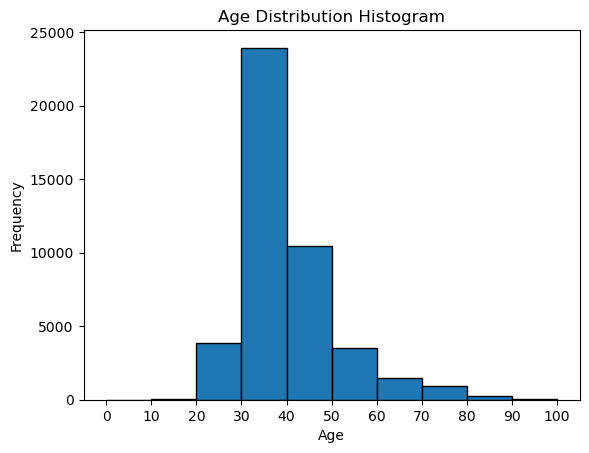

In [5]:
# Plot histograms

# Define bin edges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create the histogram
plt.hist(data = data, x = "Age", bins=bin_edges, edgecolor='k')

# Set x-axis ticks to match the bin edges
plt.xticks(bin_edges)

# Label axes and add a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()

<Axes: ylabel='Frequency'>

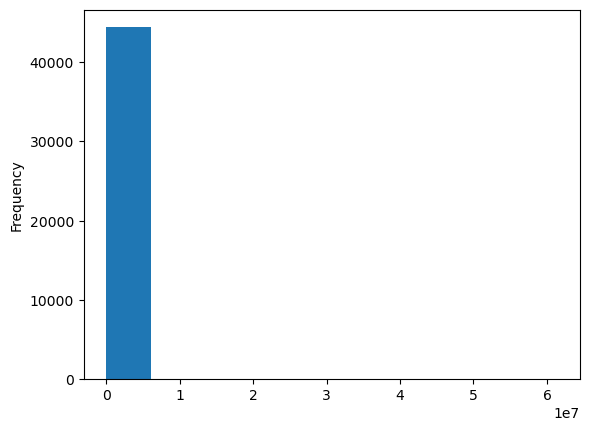

In [6]:
data["CustAccountBalance"].plot(kind = "hist")

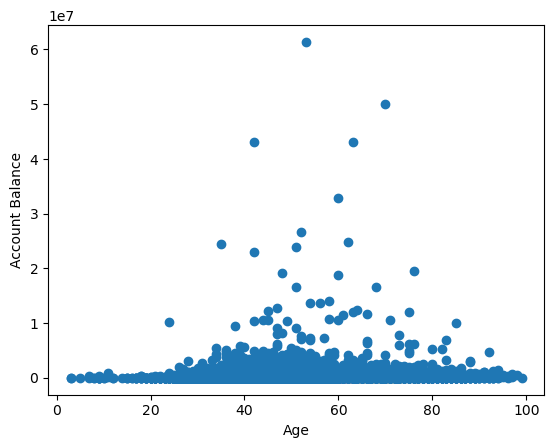

In [7]:
# Create a scatter plot for the age and account balance of a customer
plt.scatter(data = data, x = "Age", y = "CustAccountBalance")

# Label axes and add a title
plt.xlabel('Age')
plt.ylabel('Account Balance')

# Show the plot
plt.show()

In [8]:
data["CustGender"].value_counts()

CustGender
M    33453
F    11021
Name: count, dtype: int64

In [9]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

# Check for coordinates of NEW DELHI
location = geolocator.geocode("NEW DELHI")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  28.6138954
The longitude of the location is:  77.2090057


In [10]:
# Function for getting coordinates for a given city
def get_city_coordinates(city):
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

get_city_coordinates("NEW DELHI")

(28.6138954, 77.2090057)

In [11]:
# Create a Folium map centered around India
india_map_trial = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles = "OpenStreetMap")

#font_size = 15

radius = 15  # Adjust the scaling factor as needed

folium.CircleMarker(
        location=get_city_coordinates("NEW DELHI"),
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
        popup=f'{"NEW DELHI"}: {3}',
).add_to(india_map_trial)

# Show the map
india_map_trial

In [12]:
# Obtain the value counts for each city 
city_df = data[["CustLocation"]].value_counts().to_frame()

# Keep only the cities which have more than 100 customers
top_cities = city_df[city_df["count"] > 100]

# Obtain city names in a list
city_names = top_cities.index.get_level_values('CustLocation').tolist()
city_names

['MUMBAI',
 'NEW DELHI',
 'DELHI',
 'GURGAON',
 'BANGALORE',
 'NOIDA',
 'THANE',
 'CHENNAI',
 'PUNE',
 'HYDERABAD',
 'KOLKATA',
 'GHAZIABAD',
 'AHMEDABAD',
 'NAVI MUMBAI',
 'JAIPUR',
 'FARIDABAD',
 'SURAT',
 'CHANDIGARH',
 'LUCKNOW',
 'MOHALI',
 'LUDHIANA',
 'VADODARA',
 'NASHIK',
 'AGRA',
 'VISAKHAPATNAM',
 'INDORE',
 'AMRITSAR',
 'KANPUR',
 'COIMBATORE',
 'AURANGABAD',
 'GUNTUR',
 'NAGPUR',
 'JALANDHAR',
 'DEHRADUN',
 'GUWAHATI',
 'UDAIPUR',
 'PATNA',
 'GREATER NOIDA',
 'BHOPAL',
 'PANCHKULA',
 'PANIPAT',
 'SALEM',
 'PATIALA',
 'RANGA REDDY',
 'NORTH 24 PARGANAS',
 'HOWRAH',
 'ALWAR',
 'KOLHAPUR',
 'JAMSHEDPUR',
 'JAMMU',
 'MORADABAD',
 'RAIPUR',
 'SONIPAT',
 'RANCHI',
 'REWARI',
 'MEERUT',
 'RAJKOT']

In [13]:
# Get the value counts for each city which has more than 100 customers
city_counts = data[data['CustLocation'].isin(city_names)]['CustLocation'].value_counts()
city_counts

CustLocation
MUMBAI               3785
NEW DELHI            2925
DELHI                2743
GURGAON              2413
BANGALORE            2382
NOIDA                1135
THANE                1094
CHENNAI              1039
PUNE                  944
HYDERABAD             804
KOLKATA               797
GHAZIABAD             705
AHMEDABAD             693
NAVI MUMBAI           574
JAIPUR                498
FARIDABAD             487
SURAT                 381
CHANDIGARH            370
LUCKNOW               341
MOHALI                291
LUDHIANA              282
VADODARA              251
NASHIK                244
AGRA                  243
VISAKHAPATNAM         226
INDORE                211
AMRITSAR              208
COIMBATORE            195
KANPUR                195
AURANGABAD            180
GUNTUR                173
NAGPUR                170
JALANDHAR             161
DEHRADUN              160
GUWAHATI              154
GREATER NOIDA         148
PATNA                 148
UDAIPUR               148

In [14]:
# Create a Folium map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles = "OpenStreetMap")

# Progress tracker
i = 0

# Create bubble markers for each city
for city, count in city_counts.items():
    
    # Track the progress:
    if i % 10 == 0:
        print(100 * i / len(city_counts), "% finished")

    radius = count / 60 # Adjust the scaling factor as needed
    folium.CircleMarker(
        location=get_city_coordinates(city),
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
        popup=f'{city}: {count}',
    ).add_to(india_map)

    i = i + 1

# Show the map
india_map

0.0 % finished
17.54385964912281 % finished
35.08771929824562 % finished
52.63157894736842 % finished
70.17543859649123 % finished
87.71929824561404 % finished
